**Step1**: Import all the libaries

In [ ]:
import pandas as pd                               #used for data framework
import seaborn as sns                             #It is similar to matplotlib for data visualization but it provides high level interface for drawing attractive and informative statistical graphics, also handles complex data structures like dataframes
import matplotlib.pyplot as plt                   # used for data visualization
import re                                         #(Regular Expression) it is used to find and match characters and strings, also allows powerful search.
import nltk                                       #(Natural Language toolkit) it is used for working with human language data(text).
nltk.download('stopwords')                        # Stopwords are common words like(the,is,in,etc..) which have no meaning and can remove and focus on nouns & verbs
from nltk.corpus import stopwords                    # after downlaod to access stopword need to import
from sklearn.feature_extraction.text import CountVectorizer   #(sklearnfeatureextraction) is a module where CountVectorizer is imported to convert the text document into metrix token counts.
from sklearn.model_selection import train_test_split     #(from sklearnmodelselection) is a module where train_test_split funtion is imported which is mainly used in machine learning ,it is used to divide dataset in to training and testing subset.
from sklearn.naive_bayes import MultinomialNB            #(naivebayes)is used to pridict the class object and  MultinomialNB is a popular classification algorithm used for text classification
from sklearn.linear_model import LogisticRegression      #Logistic Regression is a widely used algorithm for binary and multiclass classification tasks.
from nltk.tokenize import RegexpTokenizer                # is a tokenizer that splits text into tokens using regular expressions, which allows you to have more control over how the text is split.


Step2: setting the setpwords

In [ ]:
stopwords=set(stopwords.words('english'))
regexp=RegexpTokenizer('\w+')

In [ ]:
df=pd.read_csv('/Language Detection.csv')

In [ ]:
df.head()

In [ ]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum() #is there any null values or not

Text        0
Language    0
dtype: int64

In [ ]:
df.shape #see the no rows and cols

(10337, 2)

In [ ]:
df['Language'].unique() #unique values in language column

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [ ]:
df['Language'].nunique() #count of unique values in language column and there are 17 language

17

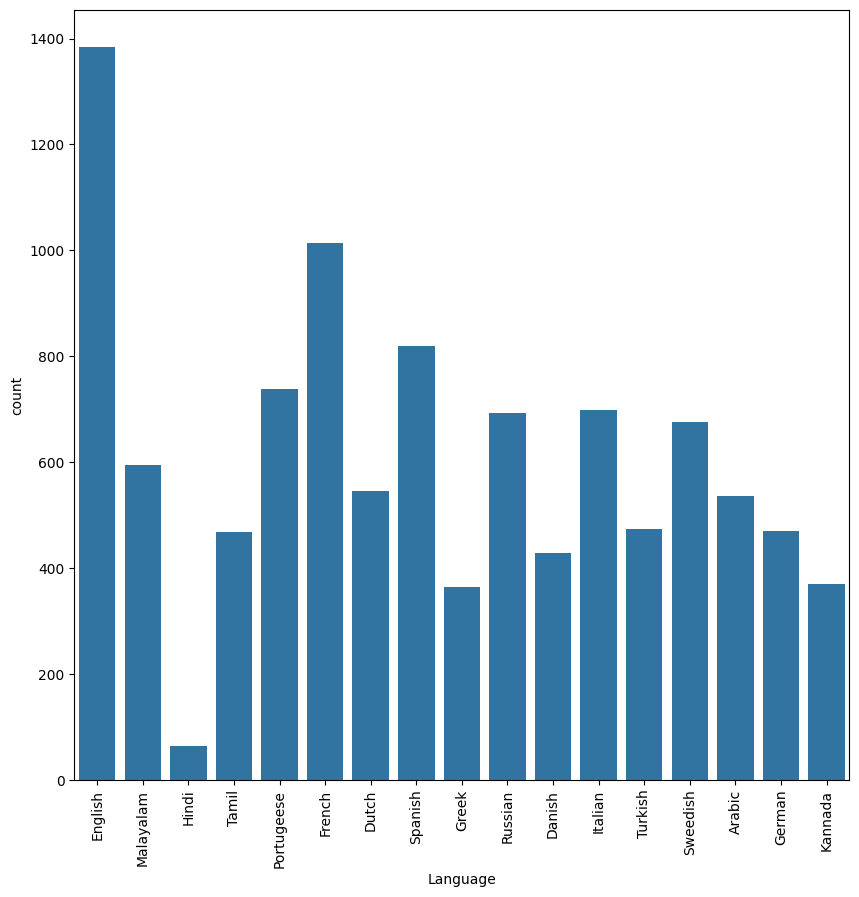

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='Language')     #to see the count of each languages
plt.xticks(rotation=90);

In [ ]:
df['Language'].value_counts() #to see the count of each languages

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Note: the english has the higest count so the chalange is to make all the languages balanced .

so we need to convert balanced dataset into imbalanced dataset

In [ ]:
Greek=df[df['Language']=='Greek']

In [ ]:
English=df[df['Language']=='English']
greek=df[df['Language']=='Greek']
russian=df[df['Language']=='Russian']
spanish=df[df['Language']=='Spanish']
french=df[df['Language']=='French']
italian=df[df['Language']=='Italian']
german=df[df['Language']=='German']
sweedish=df[df['Language']=='Sweedish']
dutch=df[df['Language']=='Dutch']
portugeese=df[df['Language']=='Portugueese']
Turkish=df[df['Language']=='Turkish']
danish=df[df['Language']=='Danish']

In [ ]:
from sklearn.utils import resample #for downsampling we use resample from skearn

In [ ]:
english_downsample=resample(English,
                            replace=True,
                            n_samples=len(Greek),
                            random_state=42)
greek_downsample=resample(Greek,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=42)
russian_downsample=resample(russian,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=42)
spanish_downsample=resample(spanish,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=42)
french_downsample=resample(french,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=42)
italian_downsample=resample(italian,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=42)
german_downsample=resample(german,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=42)
sweedish_downsample=resample(sweedish,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=42)
dutch_downsample=resample(dutch,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=42)
Turkish_downsample=resample(Turkish,
                              replace=True,
                              n_samples=len(Greek),
                              random_state=37)



In [ ]:
data_downsample=pd.concat([english_downsample
                           ,greek_downsample,
                           russian_downsample,
                           spanish_downsample,
                           french_downsample,
                           italian_downsample,
                           german_downsample,
                           sweedish_downsample,
                           dutch_downsample,
                           Turkish_downsample,
                           Greek
])

In [ ]:
data_downsample.head()

Text Language
1126  no worries imagine you came home and there are...  English
860   Due to its generality, the field is studied in...  English
1294                   unfortunately, i have to say no.  English
1130  if you ask somebody not to be upset not to cry...  English
1095  so if you are just about to embark on your jou...  English

In [ ]:
data_downsample['Language'].value_counts()

Language
Greek       730
English     365
Russian     365
Spanish     365
French      365
Italian     365
German      365
Sweedish    365
Dutch       365
Turkish     365
Name: count, dtype: int64

In [ ]:
def clean(text):
    text=text.lower()
    text=re.sub(r'[$!@%^&*]'," ",text)
    text=regexp.tokenize(text)
    text=[word for word in text if word not in stopwords]
    return " ".join(text)
    return text

In [ ]:
data_downsample['clean_Text']=data_downsample['Text'].apply(clean)

In [ ]:
data_downsample.head()

Text Language  \
1126  no worries imagine you came home and there are...  English   
860   Due to its generality, the field is studied in...  English   
1294                   unfortunately, i have to say no.  English   
1130  if you ask somebody not to be upset not to cry...  English   
1095  so if you are just about to embark on your jou...  English   

                                             clean_Text  
1126    worries imagine came home friends sitting couch  
860   due generality field studied many disciplines ...  
1294                                  unfortunately say  
1130              ask somebody upset cry say take heart  
1095                                     embark journey

In [ ]:
x=data_downsample.iloc[:,2]
y=data_downsample.iloc[:,1]

Bag of words is used to extract features from the text
it generates frequency of each word in text
countvectorizer is used to for implementing bag of words

In [ ]:
vectorizer1=CountVectorizer(ngram_range=(1,3),analyzer='char')
x1=vectorizer1.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42) #createing train and test dataset

In [ ]:
model1=MultinomialNB()                             #Creating model
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.9825653798256538

Example:
Nee dat kan ik niet. Ik zou niet eens weten waar te beginnen. Misschien kan ik naar een van de oudste zinnen in het Nederlands verwijzen, waarvan men nu denkt dat het Oud Engels was: “Hebban olla vogala nestas bagunnan, hinase ic enda thu. Wat unbidan we nu?” (11e eeuw).

In [ ]:
user=input("Enter a Text: ")
text=vectorizer1.transform([user]).toarray()               #n base model over training and testing
output=model1.predict(text)
print(output)

Enter a Text: Nee dat kan ik niet. Ik zou niet eens weten waar te beginnen. Misschien kan ik naar een van de oudste zinnen in het Nederlands verwijzen, waarvan men nu denkt dat het Oud Engels was: “Hebban olla vogala nestas bagunnan, hinase ic enda thu. Wat unbidan we nu?” (11e eeuw).
['Dutch']


In [ ]:
model2=LogisticRegression()
model2.fit(x_train,y_train)                                  # LogisticRegression model
model2.score(x_test,y_test)

0.9825653798256538

example:
Три года назад я переехал в Москву по работе. Я родился в маленьком городе на севере России, где все друг друга знают, поэтому сначала никак не мог

In [ ]:
user=input("Enter a Text: ")
text=vectorizer1.transform([user]).toarray()
output=model2.predict(text)
print(output)